<a href="https://colab.research.google.com/github/SteAmarante/python-data-science/blob/main/aula_05/dinamica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dinâmica em Grupo: “Gorjetas”

Stephanie e Phillipe

**Objetivo**: Em pequenos grupos (3‑4), extrair 3 insights chavess do dataset tips.csv e recomendar 1 ação ao restaurante.


**Resultados esperados:**
- Análise inicial das informações
- Percentual de gorjeta/conta;
- Gorjeta média (%) (geral, dia e “time”);
- Dia mais lucrativo;
- Maior conta individual + gorjeta;
- Gorjeta média para mesmas >= 4 pessoas;
- Fumantes aos domingos.
- Ao fim, executar tips["tip_pct"].plot.hist(bins=20, title="Distribuição % Gorjeta")

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

##Análise inicial das informações

In [ ]:
df = tips.copy()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.describe(percentiles=[0.3, 0.5, 0.7])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
30%,14.249000,2.000000,2.000000
50%,17.795000,2.900000,2.000000
70%,22.508000,3.480000,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.describe(include=[int])

,size
count,244.000000
mean,2.569672
std,0.951100
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,6.000000


In [ ]:
df.describe(exclude=[int])

,total_bill,tip,sex,smoker,day,time
count,244.000000,244.000000,244,244,244,244
unique,NaN,NaN,2,2,4,2
top,NaN,NaN,Male,No,Sat,Dinner
freq,NaN,NaN,157,151,87,176
mean,19.785943,2.998279,NaN,NaN,NaN,NaN
std,8.902412,1.383638,NaN,NaN,NaN,NaN
min,3.070000,1.000000,NaN,NaN,NaN,NaN
25%,13.347500,2.000000,NaN,NaN,NaN,NaN
50%,17.795000,2.900000,NaN,NaN,NaN,NaN
75%,24.127500,3.562500,NaN,NaN,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


##Percentual de gorjeta/conta

In [ ]:
df['value_per_gor'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,value_per_gor
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


##Maior conta individual + gorjeta

In [ ]:
df['total_bill'].max()

50.81

In [ ]:
df['tip'].max()

10.0

##Gorjeta média (%) (geral, dia e “time”)

In [ ]:
gor_media = df['value_per_gor'].mean()
print(f"A porcentagem média da gorjeta geral é {gor_media:.2f}")

A porcentagem média da gorjeta geral é 0.16


In [ ]:
df.groupby('day')['value_per_gor'].mean()

,value_per_gor
day,
Fri,0.169913
Sat,0.153152
Sun,0.166897
Thur,0.161276


In [ ]:
df.groupby('time')['value_per_gor'].mean()

,value_per_gor
time,
Dinner,0.159518
Lunch,0.164128


##Gorjeta média para mesas >= 4 pessoas;


In [ ]:
df_mesas_grandes = tips[tips['size'] >= 4]
df_mesas_grandes["tip"].mean()

np.float64(4.218478260869565)

##Fumantes aos domingos.


In [ ]:
fumantes = df.copy()
fumantes = fumantes[(fumantes["smoker"] == "Yes") & (fumantes["day"] == "Sun")]

In [ ]:
fumantes.shape[0]

19

##Ao fim, executar tips["tip_pct"].plot.hist(bins=20, title="Distribuição % Gorjeta")

<Axes: title={'center': 'Distribuição % Gorjeta'}, ylabel='Frequency'>

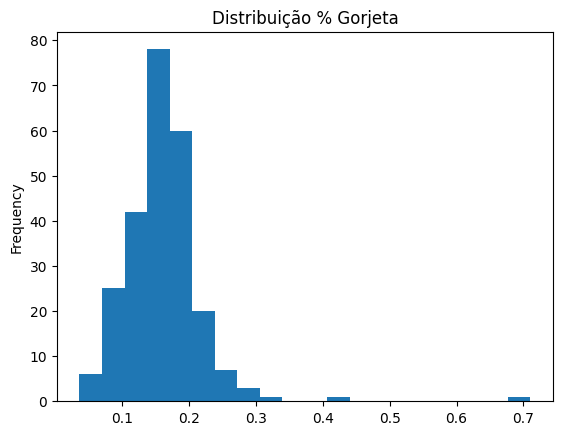

In [ ]:
tips = df.copy()
tips['value_per_gor'].plot.hist(bins=20, title="Distribuição % Gorjeta")